### Revision:
* added 'n jaren geleden' (more common in pre-WWII era) to the phrase 'n jaar geleden' (more commen post-WWII)
* added different phrasings for 'one year ago' (like 'previous year', 'last year', etc.): 'afgeloopen jaar', 'afgelopen jaar', 'vorig jaar', 'vorige jaar', 'verleden jaar'

# Looking forward and looking back in Dutch newspapers

Code suited for Parool data (different csv structure pre- and post-1965)

In [1]:
import pandas as pd
import glob
import random
import os
import string
import re
import numpy as np
from collections import Counter
from datetime import datetime
from nltk import word_tokenize
from nltk.util import ngrams
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cm as mplcm
import matplotlib.colors as colors
from matplotlib.pyplot import cm
import seaborn as sns
from tqdm.notebook import tqdm as log_progress

In [2]:
paper = 'Het Parool'
paper_short = 'parool'
path = "/Users/huijn001/surfdrive/data_lokaal/parool/"
allfiles = glob.glob(os.path.join(path, "*.csv"))

Create different lists for Parool, to account for different structure of the dataframes before and after 1965.

In [3]:
allfiles1 = []
allfiles2 = []

for file in allfiles:
    if int(file[-8:-4]) <= 1965:
        allfiles1.append(file)
        
    else:
        allfiles2.append(file)

In [4]:
def query_column(i):
    """Function for naming df columns"""
    i_df = i.replace(' ','_')
    return i_df

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in word_tokenize(words):
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '' and len(new_word) >=3:
            new_words.append(new_word)
    words_str = (" ".join(new_words))
    return words_str

def word_count(string):
    """Function to count words in text string"""
    words = string.split()
    return len(words)

def jaar_geleden(jaar):
    jaar_geleden = jaar + ' jaar geleden'
    return str(jaar_geleden)

def jaren_geleden(jaar):
    jaren_geleden = jaar + ' jaren geleden'
    return str(jaren_geleden)

## Step 1: getting the data
Make dataframe 'corpus' from newspaper documents' date, title and text

For Parool <= 1965

In [5]:
sample_size = 10000
corpus = pd.DataFrame()

for filename in log_progress(allfiles1):
    n = sum(1 for line in open(filename)) # number of records in file (excludes header)
    if n > sample_size:
        skip = sorted(random.sample(range(1,n+1),n-sample_size)) # the 0-indexed header will not be included in the skip list
        df = pd.read_csv(filename, sep=";", usecols=[4, 5, 6], skiprows=skip)
    else:
        df = pd.read_csv(filename, sep=";", usecols=[4, 5, 6])
    print("Removing " + str(len(df[df.duplicated(keep='first') == True])) + " rows...", end="\n")
    df.drop(df.index[df.duplicated(keep='first') == True], axis=0, inplace=True)
    df['Content'] = df['Content'].apply(str)
    df['text_clean'] = df['Content'].apply(remove_punctuation)
    df['text_clean'] = df['text_clean'].str.lower()
    corpus = pd.concat([corpus, df], axis=0, ignore_index=True)

  0%|          | 0/21 [00:00<?, ?it/s]

Removing 153 rows...
Removing 154 rows...
Removing 126 rows...
Removing 134 rows...
Removing 99 rows...
Removing 418 rows...
Removing 455 rows...
Removing 116 rows...
Removing 112 rows...
Removing 110 rows...
Removing 439 rows...
Removing 206 rows...
Removing 289 rows...
Removing 91 rows...
Removing 477 rows...
Removing 0 rows...
Removing 432 rows...
Removing 312 rows...
Removing 366 rows...
Removing 394 rows...
Removing 353 rows...


In [ ]:
print(corpus.head())

In [6]:
corpus['date'] = pd.to_datetime(corpus['year'], format ="%Y")
corpus = corpus.set_index('date') # voor het tellen van jaren waarnaar indirect verwezen wordt is date als index niet handig
corpus = corpus.drop(columns=['year', 'Content'])
corpus.sort_index(inplace=True)

In [7]:
corpus["no_words"] = corpus["text_clean"].str.len()

In [8]:
print(corpus.head())

                                                  article_tit  \
date                                                            
1945-01-01         Roode Kruis brachl: 2.000.000 Kg. voedsel.   
1945-01-01                    WIE „HET PAROOL” HEBBEN GELEID.   
1945-01-01  MINISTERS OP BEZOEK BIJ „HET PAROOL” Prof. Ger...   
1945-01-01                            In krijgsgevangenschap.   
1945-01-01                                          In Baarn.   

                                                   text_clean  no_words  
date                                                                     
1945-01-01  roode kruis brachl 2000000 voedsel twee millio...      1800  
1945-01-01  wie het parool hebben geleid vier jaar van zij...      2520  
1945-01-01  ministers bezoek bij het parool prof gerbrandy...      2582  
1945-01-01  krijgsgevangenschap uit baarn rijden door naar...       485  
1945-01-01  baarn onzen motor rijden door totdat baarn ben...       628  


For Parool > 1965

In [9]:
sample_size = 10000
corpus2 = pd.DataFrame()

for filename in log_progress(allfiles2):
    n = sum(1 for line in open(filename)) # number of records in file (excludes header)
    skip = sorted(random.sample(range(1,n+1),n-sample_size)) # the 0-indexed header will not be included in the skip list
    df = pd.read_csv(filename, sep=";", usecols=[1, 3, 4], skiprows=skip)
    print("Removing " + str(len(df[df.duplicated(keep='first') == True])) + " rows...", end="\n")
    df.drop(df.index[df.duplicated(keep='first') == True], axis=0, inplace=True)
    df['Content'] = df['Content'].apply(str)
    df['text_clean'] = df['Content'].apply(remove_punctuation)
    df['text_clean'] = df['text_clean'].str.lower()
    corpus2 = pd.concat([corpus2, df], axis=0, ignore_index=True)

  0%|          | 0/30 [00:00<?, ?it/s]

Removing 5 rows...
Removing 0 rows...
Removing 2 rows...
Removing 3 rows...
Removing 0 rows...
Removing 4 rows...
Removing 2 rows...
Removing 0 rows...
Removing 1 rows...
Removing 32 rows...
Removing 4 rows...
Removing 0 rows...
Removing 0 rows...
Removing 0 rows...
Removing 2 rows...
Removing 3 rows...
Removing 1 rows...
Removing 1 rows...
Removing 1 rows...
Removing 0 rows...
Removing 2 rows...
Removing 4 rows...
Removing 0 rows...
Removing 3 rows...
Removing 6 rows...
Removing 0 rows...
Removing 0 rows...
Removing 0 rows...
Removing 1 rows...
Removing 1 rows...


In [ ]:
print(corpus2.head())

Turn date column into datetime index, remove old date and raw text columns 

In [10]:
corpus2['date'] = pd.to_datetime(corpus2['date'], format ="%Y-%m-%d")
corpus2 = corpus2.set_index('date') # voor het tellen van jaren waarnaar indirect verwezen wordt is date als index niet handig
corpus2 = corpus2.drop(columns=['Content'])
corpus2.sort_index(inplace=True)

In [11]:
corpus2["no_words"] = corpus2["text_clean"].str.len()

### Merge corpus3 (1945-1965) and corpus4 (1966-1995)

In [12]:
corpus = pd.concat([corpus, corpus2], axis=0, ignore_index=False)

In [13]:
print(corpus.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 495313 entries, 1945-01-01 to 1995-12-30
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   article_tit  117749 non-null  object
 1   text_clean   495313 non-null  object
 2   no_words     495313 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 15.1+ MB
None


### Count number of trigrams per year

In [ ]:
corpus['tokenized'] = corpus.apply(lambda row: 
    word_tokenize(str(row['text_clean'])), axis=1)

In [ ]:
n = 3  # Change 'n' to any other number to generate n-grams of different lengths

# Define a function to count trigrams
def count_trigrams(row):
    trigrams = list(ngrams(row, n))
    trigram_tuples = [tuple(trigram) for trigram in trigrams]
    trigram_counts = Counter(trigram_tuples)
    return sum(count for trigram, count in trigram_counts.items())

# Apply the function to each row and create a new 'trigram_count' column
corpus['trigram_count'] = corpus['tokenized'].apply(count_trigrams)

In [ ]:
print(corpus.head())

## Querying looking back and looking forward

String count to dataframe column

In [14]:
jaren = ['twee', 'drie', 'vier', 'vijf', 'zes', 'zeven', 'acht', 'negen', 'tien', 'elf', 'twaalf', 'dertien', 'veertien', 'vijftien', 'zestien', 'zeventien', 'achttien', 'negentien', 'twintig', 'dertig', 'veertig', 'vijftig', 'zestig', 'zeventig', 'tachtig', 'negentig', 'honderd', 'honderdtien', 'honderdtwintig', 'honderddertig', 'honderdveertig', 'honderdvijftig', 'honderdzestig', 'honderdzeventig', 'honderdtachtig', 'honderdnegentig', 'tweehonderd']
print(len(jaren))

37


In [15]:
for jaar in jaren:
    # count bigrams "jaar geleden" and "jaren geleden" to calculate normalized frequency of trigrams
    corpus['jaar_jaren_geleden'] = corpus['text_clean'].str.count(r'jaar geleden|jaren geleden')
    
    # count trigrams "n jaar geleden" and "n jaren geleden"
    corpus[query_column(jaar_geleden(jaar)) + '_raw'] = corpus['text_clean'].str.count(jaar_geleden(jaar))
    corpus[query_column(jaren_geleden(jaar)) + '_raw'] = corpus['text_clean'].str.count(jaren_geleden(jaar))

In [ ]:
print(corpus.head())

Sum 'n_jaar_geleden' and 'n_jaren_geleden' for all columns where n is jaar in 'jaren'

In [16]:
for jaar in jaren:
    columns_to_sum = [col for col in corpus.columns if col.startswith(jaar)]
    corpus[jaar] = corpus[columns_to_sum].sum(axis=1)

Sum the columns with the counts of bigrams 'jaar geleden' and 'jaren geleden' to calculate relative frequencies in the next step

In [18]:
print(corpus.tail())

           article_tit                                         text_clean  \
date                                                                        
1995-12-30         NaN  binnenland heenzenden gestraften bij wet regel...   
1995-12-30         NaN  foto peter arno broerhet parool arme wim kan a...   
1995-12-30         NaN  buitenland dini stapt vandaag maar wellicht sn...   
1995-12-30         NaN  het parool hoofdredacteur sytze van der zee ad...   
1995-12-30         NaN  advertentie rabobank hgêêf met rekening coulan...   

            no_words  jaar_geleden  jaren_geleden  twee_jaar_geleden_raw  \
date                                                                       
1995-12-30      1853             0              0                      0   
1995-12-30       496             0              0                      0   
1995-12-30      4097             0              0                      0   
1995-12-30      2795             0              0                      0   
1995

Group by year and copy to new df to keep 'corpus' as a backup

In [19]:
corpus3 = corpus.drop(columns=['article_tit', 'text_clean'])

In [20]:
corpus3 = corpus3.resample('Y').sum()

### Trends in 'jaar geleden' and 'jaren geleden'

In [46]:
def legend_name(i):
    """Function for turning df columns into legend names"""
    i = i[:-9]
    i_legend = i.replace('_',' ')
    return i_legend

In [43]:
corpus3['jaar_geleden_perwords'] = corpus3['jaar_geleden'] / corpus3['no_words'] * 1000000
corpus3['jaren_geleden_perwords'] = corpus3['jaren_geleden'] / corpus3['no_words'] * 1000000
corpus3['jaar_jaren_geleden_perwords'] = corpus3['jaar_jaren_geleden'] / corpus3['no_words'] * 1000000

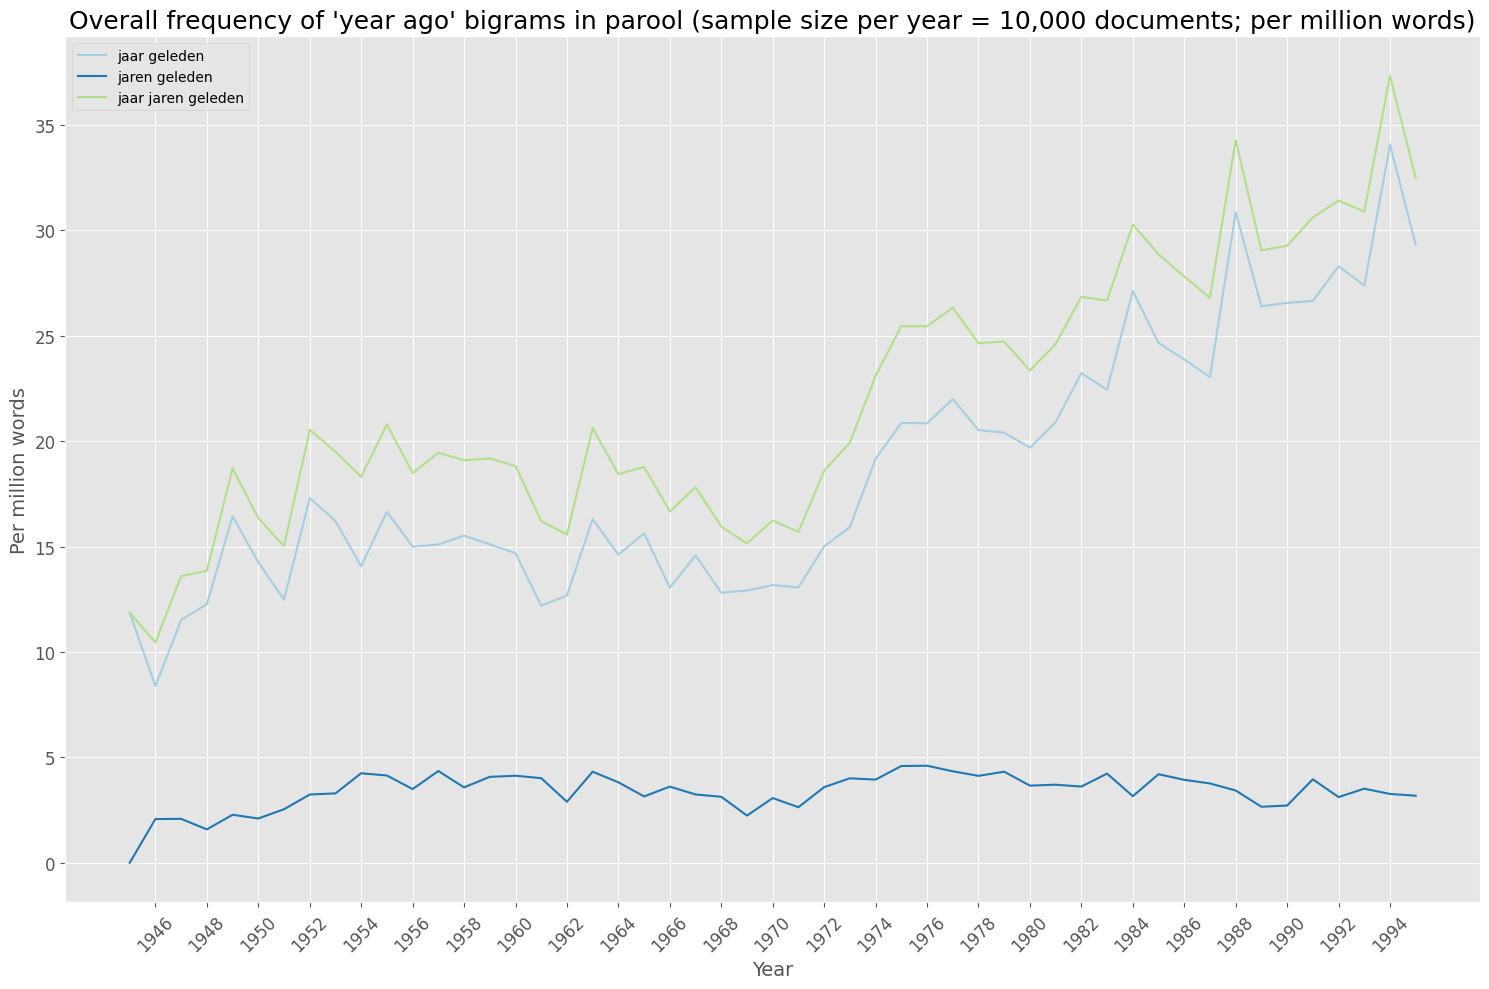

In [47]:
jaren_geleden = corpus3[['jaar_geleden_perwords', 'jaren_geleden_perwords', 'jaar_jaren_geleden_perwords']]

# Create a custom color palette with enough unique colors
custom_palette = sns.color_palette("Paired")

# Create a new figure and axis
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the lines with the custom color palette
for i, col in enumerate(jaren_geleden):
    col_name = legend_name(col)
    ax.plot(corpus3.index, corpus3[col], label=col_name, color=custom_palette[i])


# Format the x-axis to show only years
years = corpus_nor.index.year
ax.set_xticks(corpus_nor.index[years % 2 == 0])
ax.set_xticklabels(corpus_nor.index[years % 2 == 0].strftime('%Y'), rotation=45, size=12)
ax.tick_params(axis='y', labelsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set labels and legend
plt.title("Overall frequency of 'year ago' bigrams in %s (sample size per year = 10,000 documents; per million words)" %(paper_short), size=18)
plt.xlabel("Year", size=14)
plt.ylabel("Per million words", size=14)
plt.legend()

# Save the plot to desktop
plt.savefig("/Users/huijn001/Desktop/Jaren_geleden_overall_%s.png" %(paper_short), dpi=300)

# Show the plot
plt.tight_layout()
plt.show()

### Method 1: Calculate relative frequencies of each jaar in jaren relative to the total number of words per year * 10n6

In [21]:
for jaar in jaren:
    corpus3[jaar + '_perwords'] = corpus3[jaar] / corpus3['no_words'] * 1000000

In [22]:
perwords_columns = [col for col in corpus3 if str(col).endswith(('_perwords'))]
corpus_perwords = corpus3.filter(perwords_columns, axis=1)

In [23]:
corpus_perwords.to_csv('/Users/huijn001/Desktop/%s_every_years_ago_perwords.csv' %(paper_short), sep='\t')

In [24]:
print(corpus_perwords.tail())

            twee_perwords  drie_perwords  vier_perwords  vijf_perwords  \
date                                                                     
1991-12-31       4.180721       1.493115       0.895869       1.791738   
1992-12-31       4.300251       2.056642       1.931997       1.620385   
1993-12-31       3.797202       2.266986       1.530216       0.680096   
1994-12-31       5.401026       2.196022       3.086300       2.433429   
1995-12-31       5.735609       1.987587       1.362917       2.441893   

            zes_perwords  zeven_perwords  acht_perwords  negen_perwords  \
date                                                                      
1991-12-31      1.418459        0.447934       0.223967        0.522590   
1992-12-31      1.059482        0.560902       0.249290        0.186967   
1993-12-31      1.076818        1.076818       0.453397        0.340048   
1994-12-31      0.474815        0.593519       0.534167        0.296760   
1995-12-31      0.681458       

### Method 2: Calculate normalized frequencies of each jaar in jaren relative to the total frequency of bigram 'jaar geleden'/'jaren geleden'

In [25]:
for jaar in jaren:
    corpus3[jaar + '_nor'] = corpus3[jaar] / corpus3['jaar_jaren_geleden']

Make new dataframe without text column (while keeping corpus2 intact).

In [26]:
nor_columns = [col for col in corpus3 if str(col).endswith(('_nor'))]
corpus_nor = corpus3.filter(nor_columns, axis=1)

In [27]:
corpus_nor.to_csv('/Users/huijn001/Desktop/%s_every_years_ago_normalized.csv' %(paper_short), sep='\t')

In [28]:
print(corpus_nor.head())

            twee_nor  drie_nor  vier_nor  vijf_nor   zes_nor  zeven_nor  \
date                                                                      
1945-12-31  0.000000  0.000000  0.000000  0.375000  0.000000   0.000000   
1946-12-31  0.051724  0.025862  0.025862  0.068966  0.034483   0.017241   
1947-12-31  0.112903  0.024194  0.000000  0.040323  0.008065   0.040323   
1948-12-31  0.064286  0.021429  0.042857  0.085714  0.021429   0.028571   
1949-12-31  0.068783  0.010582  0.021164  0.095238  0.010582   0.010582   

            acht_nor  negen_nor  tien_nor  elf_nor  ...  honderdtien_nor  \
date                                                ...                    
1945-12-31  0.000000   0.000000  0.375000      0.0  ...              0.0   
1946-12-31  0.008621   0.000000  0.068966      0.0  ...              0.0   
1947-12-31  0.024194   0.008065  0.032258      0.0  ...              0.0   
1948-12-31  0.014286   0.007143  0.071429      0.0  ...              0.0   
1949-12-31  0.0052

### Making line charts based on 'n years ago'

<b>Line chart per year based on corpus2_rel</b>

In [40]:
#jaren2 = ['vier']
#jaren2 = ['twee', 'drie', 'vier', 'vijf', 'zes', 'zeven', 'acht', 'negen', 'tien']
#jaren2 = ['tien', 'twintig', 'dertig', 'veertig', 'vijftig', 'zestig', 'zeventig', 'tachtig', 'negentig', 'honderd']
#jaren2 = ['tien', 'honderd', 'tweehonderd']
jaren2 = ['twee', 'vier', 'vijf', 'tien']
jaren_str = '_'.join(jaren2)

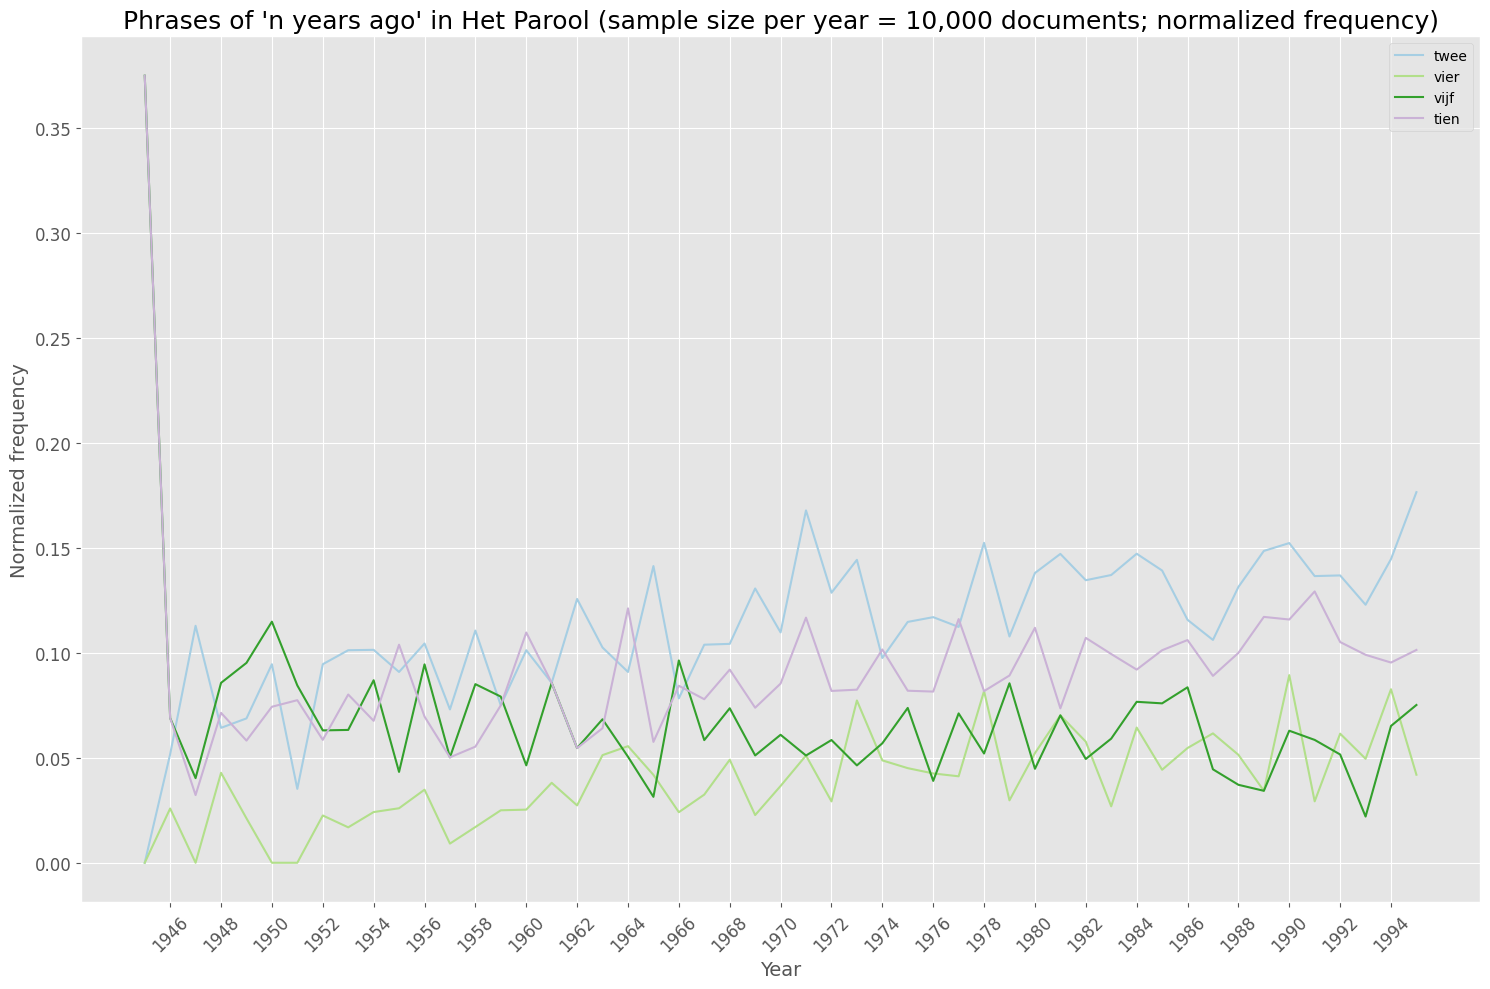

In [41]:
# Create a custom color palette with enough unique colors
custom_palette = sns.color_palette("Paired", len(corpus_nor.columns))

# Create a new figure and axis
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the lines with the custom color palette
for i, col in enumerate(corpus_nor.columns):
    if str(col)[:-4] in jaren2:
        col_name = str(col)[:-4]
        ax.plot(corpus_nor.index, corpus_nor[col], label=col_name, color=custom_palette[i])

# Format the x-axis to show only years
years = corpus_nor.index.year
ax.set_xticks(corpus_nor.index[years % 2 == 0])
ax.set_xticklabels(corpus_nor.index[years % 2 == 0].strftime('%Y'), rotation=45, size=12)
ax.tick_params(axis='y', labelsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set labels and legend
plt.title("Phrases of 'n years ago' in " + paper + " (sample size per year = 10,000 documents; normalized frequency)", size=18)
plt.xlabel("Year", size=14)
plt.ylabel("Normalized frequency", size=14)
plt.legend()

# Save the plot to desktop
plt.savefig("/Users/huijn001/Desktop/%s_%s_normalized.png" %(paper_short, jaren_str), dpi=300)

# Show the plot
plt.tight_layout()
plt.show()


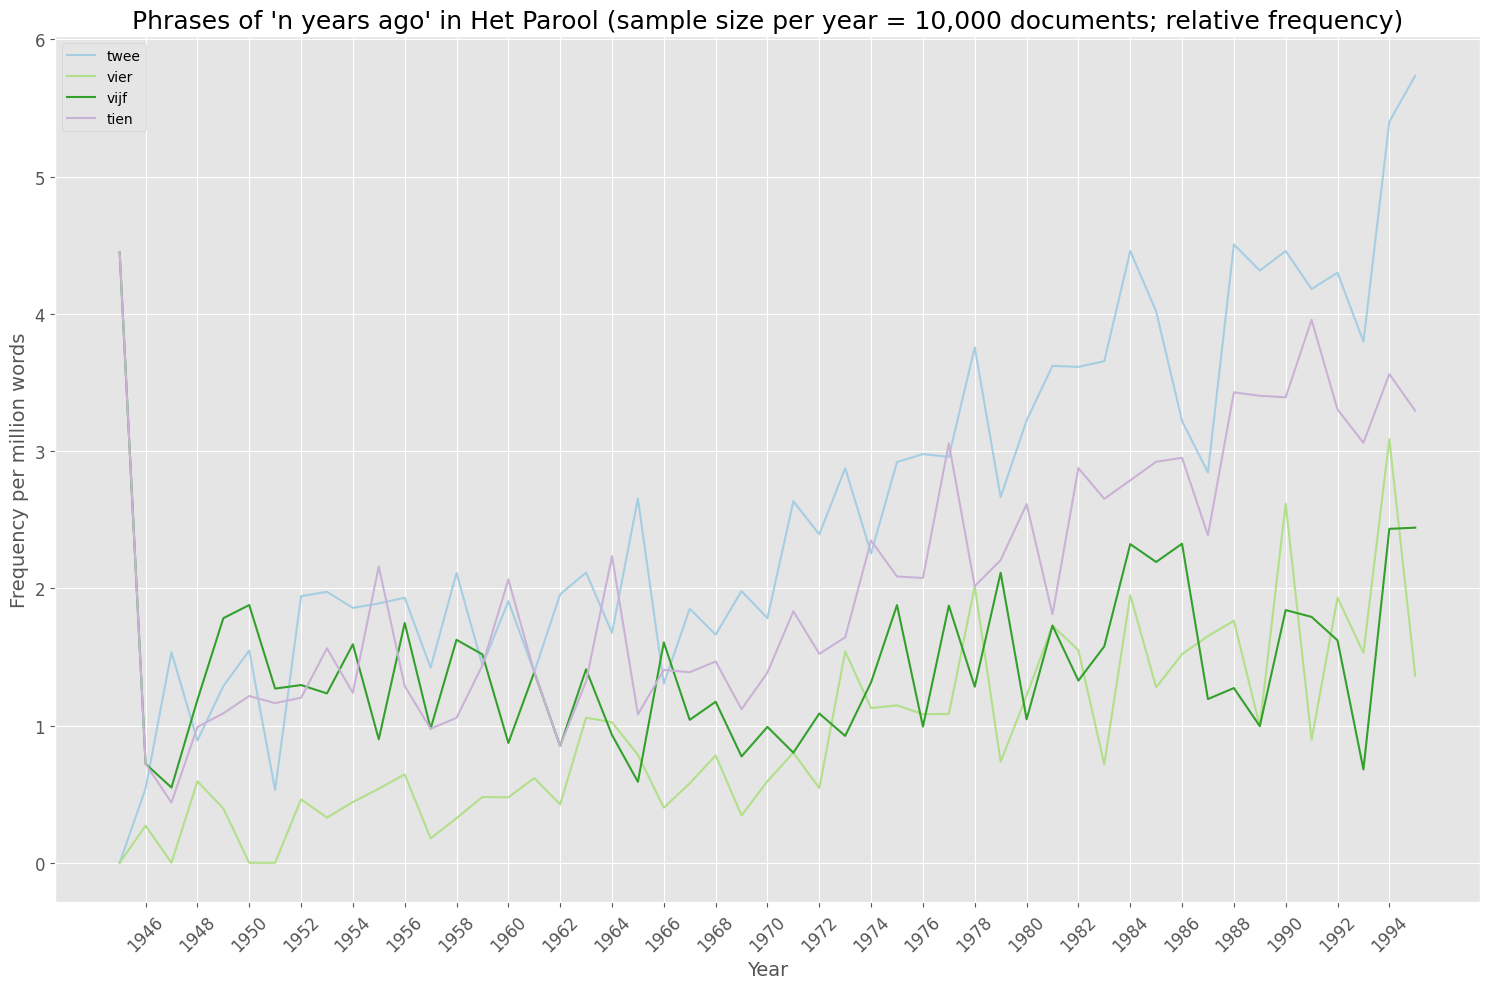

In [42]:
# Create a custom color palette with enough unique colors
custom_palette = sns.color_palette("Paired", len(corpus_perwords.columns))

# Create a new figure and axis
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the lines with the custom color palette
for i, col in enumerate(corpus_perwords.columns):
    if str(col)[:-9] in jaren2:
        col_name = str(col)[:-9]
        ax.plot(corpus_perwords.index, corpus_perwords[col], label=col_name, color=custom_palette[i])

# Format the x-axis to show only years
years = corpus_perwords.index.year
ax.set_xticks(corpus_perwords.index[years % 2 == 0])
ax.set_xticklabels(corpus_perwords.index[years % 2 == 0].strftime('%Y'), rotation=45, size=12)
ax.tick_params(axis='y', labelsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set labels and legend
plt.title("Phrases of \'n years ago\' in " + paper + " (sample size per year = 10,000 documents; relative frequency)", size=18)
plt.xlabel("Year", size=14)
plt.ylabel("Frequency per million words", size =14)
plt.legend()

# save the plot to desktop
plt.savefig("/Users/huijn001/Desktop/%s_%s_years_perwords.png" %(paper_short, jaren_str), dpi=300)

# Show the plot
plt.tight_layout()
plt.show()

## References to last year

In [ ]:
corpus['een_jaar_geleden'] = corpus["text_clean"].str.count('een jaar geleden')
corpus['afgelopen_jaar'] = corpus["text_clean"].str.count('afgelopen jaar')
corpus['afgeloopen_jaar'] = corpus["text_clean"].str.count('afgeloopen jaar')
corpus['vorig_jaar'] = corpus["text_clean"].str.count('vorig jaar')
corpus['vorige_jaar'] = corpus["text_clean"].str.count('vorige jaar')
corpus['verleden_jaar'] = corpus["text_clean"].str.count('verleden jaar')

In [ ]:
corpus['afgelopen_jaar'] = corpus['afgelopen_jaar'] + corpus['afgeloopen_jaar']
corpus['vorig_jaar'] = corpus['vorig_jaar'] + corpus['vorige_jaar']

In [ ]:
corpus4 = corpus.drop(columns=['article_tit', 'text_clean'])

In [ ]:
corpus4 = corpus4.resample('Y').sum()

Method 1:

In [ ]:
corpus4['een_jaar_geleden_perwords'] = corpus4['een_jaar_geleden'] / corpus4['no_words'] * 1000000
corpus4['afgelopen_jaar_perwords'] = corpus4['afgelopen_jaar'] / corpus4['no_words'] * 1000000
corpus4['vorig_jaar_perwords'] = corpus4['vorig_jaar'] / corpus4['no_words'] * 1000000
corpus4['verleden_jaar_perwords'] = corpus4['verleden_jaar'] / corpus4['no_words'] * 1000000

In [ ]:
year_perwords_columns = [col for col in corpus4 if str(col).endswith(('_perwords'))]
corpus_year_perwords = corpus4.filter(year_perwords_columns, axis=1)

In [ ]:
corpus_year_perwords.to_csv('/Users/huijn001/Desktop/%s_lastyear_perwords.csv' %(paper_short), sep='\t')

In [ ]:
print(corpus_year_perwords.head())

In [ ]:
# Create a new figure and axis
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the lines
for col in corpus_year_perwords.columns:
    col_name = str(col)[:-9]
    print(col_name)
    ax.plot(corpus_year_perwords.index, corpus_year_perwords[col], label=col_name)

# Format the x-axis to show only years
years = corpus_year_perwords.index.year
ax.set_xticks(corpus_year_perwords.index[years % 2 == 0])
ax.set_xticklabels(corpus_year_perwords.index[years % 2 == 0].strftime('%Y'), rotation=45, size=12)
ax.tick_params(axis='y', labelsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set labels and legend
plt.title("Varieties of references to last year in " + paper + " (sample size per year = 10,000 documents; relative frequency)", size=18)
plt.xlabel("Year", size=14)
plt.ylabel("Frequency per million words", size =14)
plt.legend()

# save the plot to desktop
plt.savefig("/Users/huijn001/Desktop/%s_lastyear_perwords.png" %(paper_short), dpi=300)

# Show the plot
plt.tight_layout()
plt.show()

Method 3:

In [ ]:
corpus4['een_jaar_geleden_nor'] = corpus4['een_jaar_geleden'] / corpus3['jaar_jaren_geleden']
corpus4['afgelopen_jaar_nor'] = corpus4['afgelopen_jaar'] / corpus3['jaar_jaren_geleden']
corpus4['vorig_jaar_nor'] = corpus4['vorig_jaar'] / corpus3['jaar_jaren_geleden']
corpus4['verleden_jaar_nor'] = corpus4['verleden_jaar'] / corpus3['jaar_jaren_geleden']

In [ ]:
year_nor_columns = [col for col in corpus4 if str(col).endswith(('_nor'))]
corpus_year_nor = corpus4.filter(year_nor_columns, axis=1)

In [ ]:
corpus_year_perwords.to_csv('/Users/huijn001/Desktop/' + paper_short + '_lastyear_nor.csv', sep='\t')

In [ ]:
# Create a new figure and axis
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the lines
for col in corpus_year_nor.columns:
    col_name = str(col)[:-4]
    print(col_name)
    ax.plot(corpus_year_nor.index, corpus_year_nor[col], label=col_name)

# Format the x-axis to show only years
years = corpus_year_nor.index.year
ax.set_xticks(corpus_year_nor.index[years % 2 == 0])
ax.set_xticklabels(corpus_year_nor.index[years % 2 == 0].strftime('%Y'), rotation=45, size=12)
ax.tick_params(axis='y', labelsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set labels and legend
plt.title("Varieties of references to last year in " + paper + " (sample size per year = 10,000 documents; normalized frequency)", size=18)
plt.xlabel("Year", size=14)
plt.ylabel("Normalized frequency", size =14)
plt.legend()

# save the plot to desktop
plt.savefig("/Users/huijn001/Desktop/%s_lastyear_nor.png" %(paper_short), dpi=300)

# Show the plot
plt.tight_layout()
plt.show()

## Counting frequency of years refered to by 'n years ago'

In [ ]:
corpus3.index = corpus3.index.year

In [ ]:
corpus3.reset_index(inplace=True) # turn 'date' into normal column to calculate target_year ('jaar_' + jaar)

In [ ]:
print(corpus3.head())

In [ ]:
numbers = {'1':'een', '2':'twee', '3':'drie', '4':'vier', '5':'vijf', '6':'zes', '7':'zeven', '8':'acht', '9':'negen', '10':'tien', '11':'elf', '12':'twaalf', '13':'dertien', '14':'veertien', '15':'vijftien', '16':'zestien', '17':'zeventien', '18':'achttien', '19':'negentien', '20':'twintig', '30':'dertig', '40':'veertig', '50':'vijftig', '60':'zestig', '70':'zeventig', '80':'tachtig', '90':'negentig', '100':'honderd', '110':'honderdtien', '120':'honderdtwintig', '130':'honderddertig', '140':'honderdveertig', '150':'honderdvijftig', '160':'honderdzestig', '170':'honderdzeventig', '180':'honderdtachtig', '190':'honderdnegentig', '200':'tweehonderd'}

def word_to_number(getal):
    for number, word in numbers.items():
        if getal == word:
            word_number = number
    return int(word_number)

def jaar_geleden(jaar): # Herhaling van hierboven, omdat dat om de een of andere reden moet. Werkt dit?
    jaar_geleden = jaar + ' jaar geleden'
    return str(jaar_geleden)

def over_jaar(jaar): # Herhaling van hierboven, omdat dat om de een of andere reden moet. Werkt dit?
    over_jaar = 'over ' + jaar + ' jaar'
    return str(over_jaar)

In [ ]:
print(len(jaren))

Deze loop maakt voor elk jaar in jaren een kolom in corpus2 die uitrekent naar welk jaar 'n jaar geleden' verwijst. Vervolgens maakt hij een dictionary die voor elk jaar het jaar-waarnaar-verwezen-wordt als key neemt en de frequentie van de string 'n jaar geleden' als value. Dit telt de loop voor elk jaar in jaren bij elkaar op in final_dict (gaat via Counter, daarom lege Counter(add_dict) gemaakt).

In [ ]:
final_dict = {}
add_dict = {}
add_dict = Counter(add_dict)

for jaar in jaren:
    corpus3['jaar_' + jaar] = [row - word_to_number(jaar) for row in corpus3['date'].astype(int)]
    mydict = {d['jaar_' + jaar]: d[query_column(jaar_geleden(jaar)) + '_raw'] for d in corpus3.to_dict(orient='records')} # https://stackoverflow.com/questions/40924592/python-dictionary-comprehension-with-pandas
    mydict_counter = Counter(mydict) # https://www.kite.com/python/answers/how-to-add-values-from-two-dictionaries-in-python
    add_dict = add_dict + mydict_counter
    
final_dict = dict(add_dict)
    

In [ ]:
print(corpus3.head())

In [ ]:
print(final_dict)

In [ ]:
df_years_ago = pd.DataFrame.from_dict(final_dict, orient='index')
df_years_ago = df_years_ago.sort_index(axis = 0)
print(df_years_ago.head())

In [ ]:
fig, ax = plt.subplots(figsize = [15,8])
cmap = plt.get_cmap('Dark2')

ax.bar(df_years_ago.index, df_years_ago[0], color=cmap(0))
plt.xticks(np.arange(min(df_years_ago.index), max(df_years_ago.index)+1, 5.0))
plt.xticks(rotation=45)
ax.set_xlabel('Time')
ax.set_ylabel('Frequency per Million words')
ax.set_title('Years refered to via \'n years ago\' in ' + paper +  ' (sample size per year = 10,000 docs)')
plt.show()

In [ ]:
fig.savefig("/Users/huijn001/Desktop/%s_years_ago_ref.png" %(paper_short), dpi=300)

### Slicing on centuries

In [ ]:
seventeen = df_years_ago.loc[1720:1800]
eighteen = df_years_ago.loc[1800:1900]
nineteen = df_years_ago.loc[1900:2000]
centuries = [seventeen, eighteen, nineteen]

In [ ]:
fig, axs = plt.subplots(3,1, figsize = [15,20], sharey=False)
num_colors2 = len(centuries)
cmap = plt.get_cmap('Dark2') # See https://matplotlib.org/stable/tutorials/colors/colormaps.html

for no, i in enumerate(centuries):
    ax = axs[no]
    ax.bar(i.index, i[0], color=cmap(no))
    ax.set_xticks(np.arange(min(i.index), max(i.index)+1, 5.0))
    ax.set_xlabel('Time')
    ax.set_ylabel('Frequency per Million words')
    ax.set_title('Years referred to via \'n years ago\' in ' + paper + ' (sample size per year = 10,000 docs)')
plt.show()

In [ ]:
fig.savefig("/Users/huijn001/Desktop/" + paper_short + "_years_ago_ref1.png", dpi=300)

In [ ]:
df_years_ago.to_csv("/Users/huijn001/Desktop/years_referenced_%s.csv" %(paper_short))

### Now the same for 'over n jaar'

In [ ]:
final_dict2 = {}
add_dict2 = {}
add_dict2 = Counter(add_dict2)

for jaar in jaren:
    corpus2['jaar_' + jaar] = [row + word_to_number(jaar) for row in corpus2['date'].astype(int)]
    #    mydict[jaar] = dict(zip(df['jaar_' + jaar], df['count_' + jaar])) # https://stackoverflow.com/questions/18695605/python-pandas-dataframe-to-dictionary
    mydict2 = {d['jaar_' + jaar]: d[query_column(over_jaar(jaar)) + '_permill'] for d in corpus2.to_dict(orient='records')} # https://stackoverflow.com/questions/40924592/python-dictionary-comprehension-with-pandas
    mydict_counter2 = Counter(mydict2) # https://www.kite.com/python/answers/how-to-add-values-from-two-dictionaries-in-python
    add_dict2 = add_dict2 + mydict_counter2
    
final_dict2 = dict(add_dict2) 

In [ ]:
jaren2 = pd.DataFrame.from_dict(final_dict2, orient='index')
jaren2 = jaren2.sort_index(axis = 0)
print(jaren2.head())

In [ ]:
fig, ax = plt.subplots(figsize = [15,8])
cmap = plt.get_cmap('Dark2')

ax.bar(jaren2.index, jaren2[0], color=cmap(0))
plt.xticks(np.arange(min(jaren2.index), max(jaren2.index)+1, 5.0))
plt.xticks(rotation=45)
ax.set_xlabel('Time')
ax.set_ylabel('Frequency per Million words')
ax.set_title('Years referred to via \'over n years\' in ' + paper + ' (sample size per year = 10,000 docs)')
plt.show()

In [ ]:
fig.savefig("/Users/huijn001/Desktop/" + paper_short + "_over_years_ref.png", dpi=300)

### Slicing on centuries

In [ ]:
eighteen2 = jaren2.loc[1895:1900]
nineteen2 = jaren2.loc[1900:2000]
twenty2 = jaren2.loc[2000:2100]
centuries2 = [nineteen2, twenty2]

In [ ]:
fig, axs = plt.subplots(2,1, figsize = [15,16], sharey=False)
cmap = plt.get_cmap("Dark2")

for no, i in enumerate(centuries2):
    ax = axs[no]
    ax.bar(i.index, i[0], color=cmap(no))
    ax.set_xticks(np.arange(min(i.index), max(i.index)+1, 5.0))
    ax.set_xlabel('Time')
    ax.set_ylabel('Frequency per Million words')
    ax.set_title('Years referred to via \'over n years\' in ' + paper + ' (sample size per year = 10,000 docs)')
plt.show()

In [ ]:
fig.savefig("/Users/huijn001/Desktop/" + paper_short + "_over_years_ref1.png", dpi=300)

### Combining results of 'n years ago' and 'over n years' between 1900 and 2000

In [ ]:
nineteen_total = nineteen.merge(nineteen2, left_index=True, right_index=True, how='outer')
nineteen_total = nineteen_total.rename(columns={'0_x':'n years ago', '0_y': 'in n years'})
print(nineteen_total.head())

In [ ]:
fig, ax = plt.subplots(figsize = [15,8])
cmap = plt.get_cmap('Dark2')

ax.bar(nineteen_total.index, nineteen_total['n years ago'], label='n years ago', color=cmap(5))
ax.bar(nineteen_total.index, nineteen_total['in n years'], label='in n years', color=cmap(4), bottom = nineteen_total['n years ago'])
plt.xticks(np.arange(min(nineteen_total.index), max(nineteen_total.index)+1, 5.0))
plt.xticks(rotation=45)
ax.set_xlabel('Time')
ax.set_ylabel('Frequency per Million words')
ax.set_title('Years referred to via \'n years ago\' and \'over n years\' in ' + paper + ' (sample size per year = 10,000 docs)')
plt.legend()
plt.show()

In [ ]:
fig.savefig("/Users/huijn001/Desktop/" + paper_short + "_over_ago_nineteen.png", dpi=300)

### Which years are mentioned (as years: '1901') per year in the text?

Count number of times years between 1900 and 2000 are mentioned in a given year. Store results in column named after the year (both as raw number and per million words in that year)

In [ ]:
for i in range(1700, 2101):
    corpus2[str(i) + '_raw'] = corpus2["text_clean"].str.count(str(i))
    corpus2[str(i) + '_permill'] = corpus2[str(i) + '_raw'] / corpus2['no_words'] * 1000000

In [ ]:
#print(corpus2.head())

Make new dataframe df_years from all permill columns from years 1700-2100

In [ ]:
filter_years_columns = [col for col in corpus2 if str(col).startswith(('17', '18', '19', '20')) and str(col).endswith('permill')]
df_years = corpus2.filter(filter_years_columns, axis=1)

Make new dataframe df_years2 from sum of years ('total') that are counted

In [ ]:
df_years.loc['total'] = df_years.select_dtypes(float).sum()
df_years2 = pd.DataFrame(df_years.loc['total', :])

In [ ]:
print(df_years2.tail())

make 'date' column from index (removing '\_permill'), set this date column to index, drop original date column

In [ ]:
df_years2['date'] = [x.replace('_permill', '') for x in df_years2.index]
df_years2.set_index(df_years2['date'], drop=True, inplace=True)
df_years2 = df_years2.drop(columns = 'date', inplace=False)
df_years2.index = df_years2.index.astype(int)
df_years2.sort_index()

drop rows of centennials (1700, 1800, 1900, 2000), because they skew the graph because of very high values

In [ ]:
df_years2 = df_years2.drop([1700, 1800, 1900, 2000], axis=0, inplace=False)

In [ ]:
print(df_years2.head())

make bar chart

In [ ]:
fig, ax = plt.subplots(figsize=[15,8])
cmap = plt.get_cmap("Dark2")
ax.bar(df_years2.index, df_years2['total'], color=cmap(0))
plt.xticks(np.arange(min(df_years2.index), max(df_years2.index)+1, 10.0))
plt.xticks(rotation=45)
plt.show()

In [ ]:
fig.savefig("/Users/huijn001/Desktop/years_limbdag_total.png", dpi=300)

In [ ]:
df_years_seventeen = df_years2.loc[1701:1801]
df_years_eighteen = df_years2.loc[1801:1901]
df_years_nineteen = df_years2.loc[1901:2001]
df_years_twenty = df_years2.loc[2001:2100]
df_years_total2 = [df_years_seventeen, df_years_eighteen, df_years_nineteen, df_years_twenty]

In [ ]:
print(df_years_seventeen.head())

In [ ]:
fig, axs = plt.subplots(4,1, figsize = [15,30], sharey=True)
cmap = plt.get_cmap("Dark2")

for no, i in enumerate(df_years_total2):
    ax = axs[no]
    ax.bar(i.index, i['total'], color=cmap(no))
    ax.set_xticks(np.arange(min(i.index), max(i.index)+1, 2.0))
    ax.tick_params(axis='x', labelsize='small', labelcolor='grey', rotation=90)
    ax.set_xlabel('Time')
    ax.set_ylabel('Frequency per Million words')
    ax.set_title('Years referred to in De Telegraaf (sample size per year = 10,000 docs)')
plt.show()

In [ ]:
fig.savefig("/Users/huijn001/Desktop/years_limbdag.png", dpi=300)

### To do

Via nlargest (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nlargest.html) kun je de n rijen met de hoogste waarden van kolom columns printen)

### Combine values of references to absolute years ('1910') and indirect references ('two years ago')

Not very useful since the values for absolute years are a factor 100-1000 higher than those of indirect references

Merge how='outer' returns indices that have values in only one of both columns. We set the other column to 0 in order to make a bar chart. 

In [ ]:
df_years_total = df_years_ago.merge(df_years2, left_index=True, right_index=True, how='outer')
df_years_total = df_years_total.rename(columns={0:'total_ref', 'total': 'total_year'})
df_years_total = df_years_total.sort_index()
df_years_total = df_years_total.fillna(0)

Let's see what happens if we multiply the indirect references column by 100

In [ ]:
df_years_total['total_ref'] = df_years_total['total_ref'] * 100

In [ ]:
fig, ax = plt.subplots(figsize=[15,8])
ax.bar(df_years_total.index, df_years_total['total_year'])
ax.bar(df_years_total.index, df_years_total['total_ref'], bottom=df_years_total['total_year'])
plt.xticks(np.arange(min(df_years_total.index), max(df_years_total.index)+1, 2.0))
plt.xticks(rotation=60)
plt.show()

## Create list of n-grams of variations of "n years ago"

Creating a matrix of years (rows) and variations of "n years ago" (columns)

In [ ]:
corpus3 = corpus.groupby((corpus.index.year//10)*10).sum()
corpus3["no_words"] = corpus3["text_clean"].str.len()

In [ ]:
print(corpus3.shape)

In [ ]:
print(corpus3.head(10))

In [ ]:
ago_df_final = pd.DataFrame()

for index, row in log_progress(corpus3.iterrows()):
    text_list = corpus3.loc[index, 'text_clean'].split()
    columns = ['first', 'second', 'third']
    ngrams_df = pd.DataFrame(ngrams(text_list, 3), columns = columns).astype(str)
    ngrams_df['trigrams'] = ngrams_df['first'].str.cat([ngrams_df['second'], ngrams_df['third']], sep=' ')
    ngrams_df.drop(['first', 'second', 'third'], axis=1, inplace=True)
    ngrams_df['no_trigrams'] = len(ngrams_df['trigrams'])
    ngrams_df['ago'] = ngrams_df['trigrams'][ngrams_df['trigrams'].str.endswith(r"jaar geleden|jaren geleden")]
    ago_df = ngrams_df['ago'].value_counts().rename_axis('jaar').to_frame(index).transpose()
    ago_df['no_trigrams'] = ngrams_df['no_trigrams']
    ago_df_final = pd.concat([ago_df_final, ago_df], axis=0, ignore_index=False) 

In [ ]:
ago_df_final['no_words'] = corpus3['no_words']

In [ ]:
print(ago_df_final.head())

In [ ]:
for column in ago_df_final:
    ago_df_final[column] = (ago_df_final[column] / ago_df_final['no_trigrams']) * 1000000

In [ ]:
print(ago_df_final.head())

Transposing the df above into a matrix of variations of "n years ago" (rows) and years (columns)

In [ ]:
ago_df_final_trp3 = ago_df_final.transpose()
print(ago_df_final_trp3.head())

In [ ]:
ago_df_final_trp3.to_csv('/Users/huijn001/Desktop/Telegraaf10000_geleden_ngrams_permilltrigrams.csv')

In [ ]:
ago_df_final_trp3 = pd.read_csv('/Users/huijn001/Desktop/Telegraaf10000_geleden_ngrams_permill.csv', index_col=0)

In [ ]:
print(ago_df_final_trp3.head())

Sum all rows (= variations of "years ago") per decade from ago_df_final_trp3 and put in dictionary 'total_dict'

In [ ]:
print(int(ago_df_final_trp3['1890'].sum()) - 1000000)

In [ ]:
total_dict = {}

for column in ago_df_final_trp3:
    total = ago_df_final_trp3[column].sum() - 1000000
    total_dict[column] = int(total)

In [ ]:
print(total_dict)

In [ ]:
keys = total_dict.keys()

values = total_dict.values()


plt.bar(keys, values)
plt.show()